#Treatment affecting the GUm disease
#id=Code for each patient. Two rows for each subject: one before and one after gum cleaning.
#strep=Percentage of Streptococcus bacteria
#lepto=Percentage of Leptotrichia bacteria
#prev=Percentage of Prevotella bacteria
#fuso=Percentage of Fusobacteria bacteria
#veil=Percentage of Veillonella bacteria
#time=Time that sample was taken: 1–before gum cleaning; 2–after gum cleaning status=Disease 
#status: 1 is healthy, 2       is diseased gums
#pocket=Average gum pocket depth across all the teeth in the mouth (in millimeters) 
#deepest=Depth of the deepest gum       pocket in the mouth (in millimeters)



In [ ]:
#install.packages("vegan")

In [ ]:
library(ggplot2)

In [12]:
data  <- read.table("RTestData.txt",header= TRUE)

In [2]:
str(data)

'data.frame':	72 obs. of  10 variables:
 $ id     : Factor w/ 36 levels "S001","S006",..: 1 1 2 2 3 3 4 4 5 5 ...
 $ strep  : num  57.4 26 19 15.2 33.2 18 12.3 3.3 9.1 22 ...
 $ prev   : num  10.2 0 24.2 4.2 2.3 0.3 11.5 24.7 32.7 8.9 ...
 $ lepto  : num  0.1 25.6 4.8 0.2 7.4 13.6 9.1 6.3 1.9 17.8 ...
 $ fuso   : num  0 0 5.7 2.6 1.3 1.7 5.5 10.4 14.3 4.8 ...
 $ veil   : num  6.9 6.3 4.2 3.4 12 13.8 5.7 3 1.6 14 ...
 $ time   : int  1 2 1 2 1 2 1 2 1 2 ...
 $ status : int  2 2 1 1 2 2 1 1 1 1 ...
 $ pocket : num  2.7 2.7 2.5 2.4 2.4 2.4 2.6 2.5 2.9 2.5 ...
 $ deepest: num  3.8 3 3.2 3.2 2.7 2.8 3.5 3.2 4 3.5 ...


In [3]:
head(data)

id,strep,prev,lepto,fuso,veil,time,status,pocket,deepest
S001,57.4,10.2,0.1,0.0,6.9,1,2,2.7,3.8
S001,26.0,0.0,25.6,0.0,6.3,2,2,2.7,3.0
S006,19.0,24.2,4.8,5.7,4.2,1,1,2.5,3.2
S006,15.2,4.2,0.2,2.6,3.4,2,1,2.4,3.2
S007,33.2,2.3,7.4,1.3,12.0,1,2,2.4,2.7
S007,18.0,0.3,13.6,1.7,13.8,2,2,2.4,2.8


In [4]:
attach(data)

QQNorm for all the bacteria and deepest

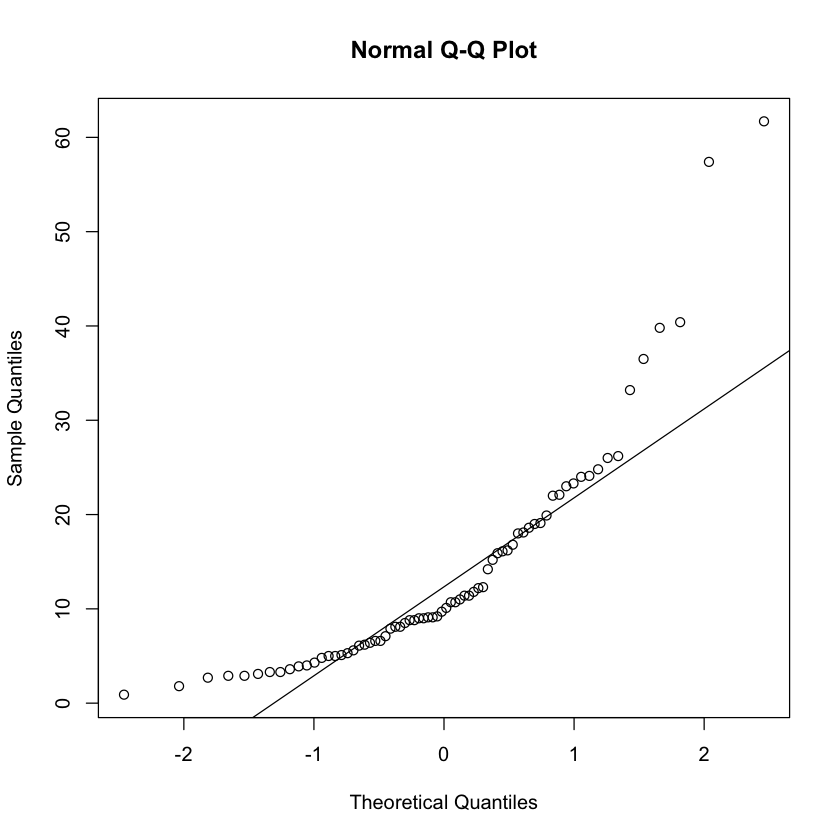

In [5]:
qqnorm(strep)
qqline(strep)

Strep is not normally distributed so using log to transform the data

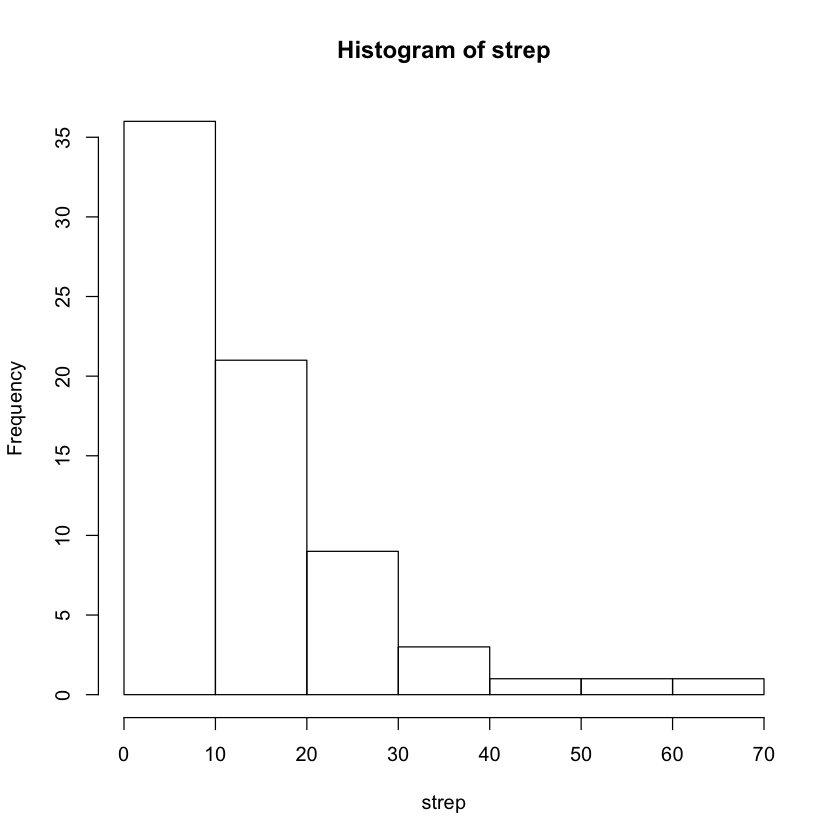

In [6]:
hist(strep)

Strep data is not normally distributed
Using log Transformation


	Shapiro-Wilk normality test

data:  data$strep_log
W = 0.99103, p-value = 0.8934


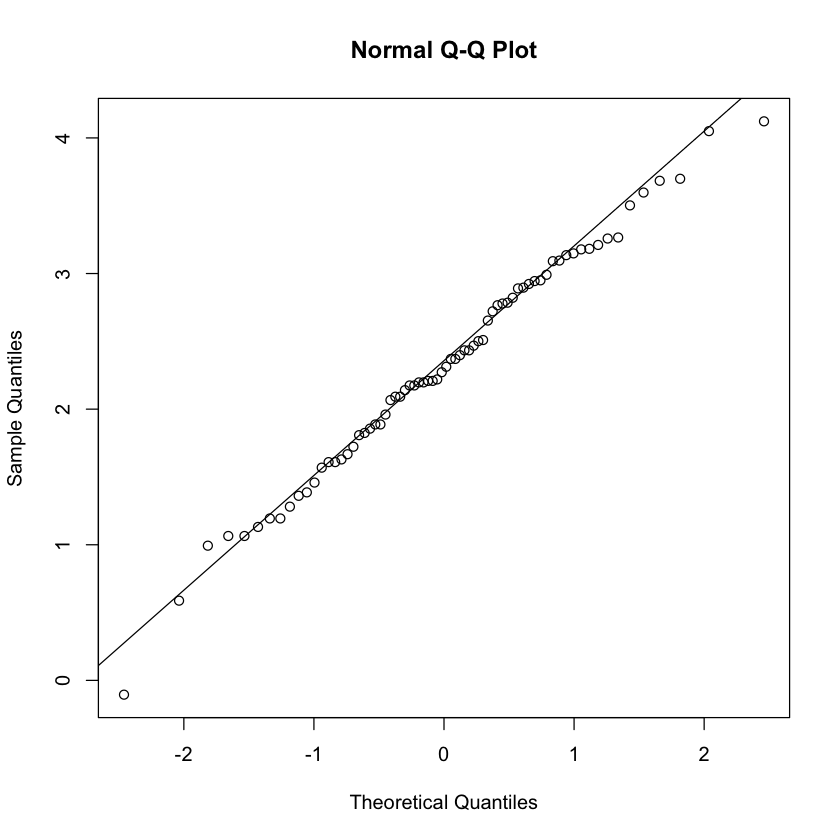

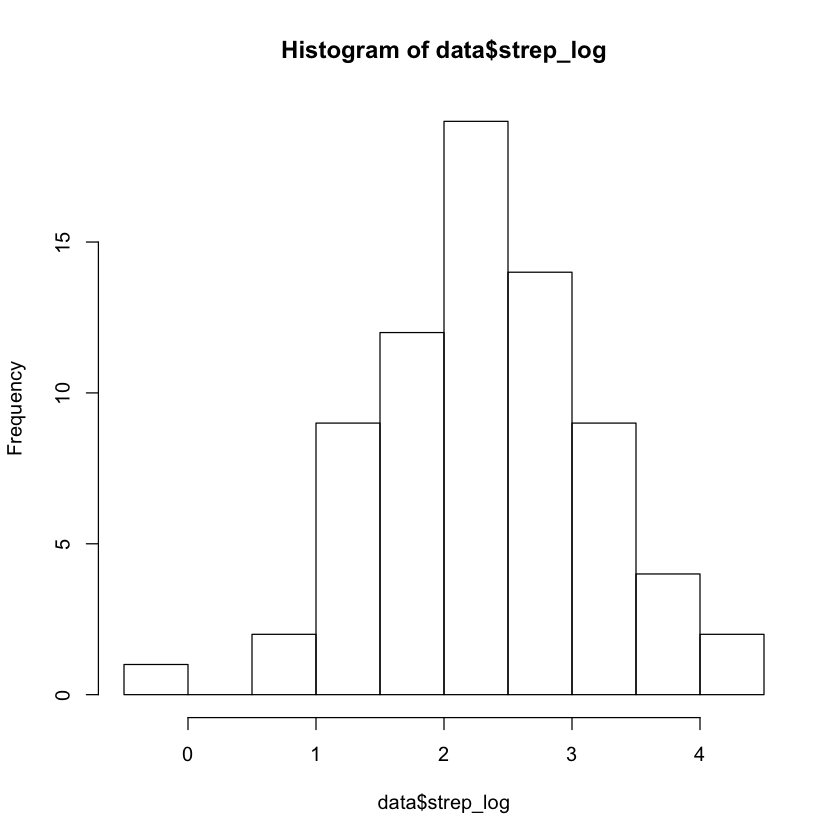

In [7]:
data$strep_log  <- log(strep)
qqnorm(data$strep_log)
qqline(data$strep_log)
shapiro.test(data$strep_log)
hist(data$strep_log)

Checking normal distribution of Prev

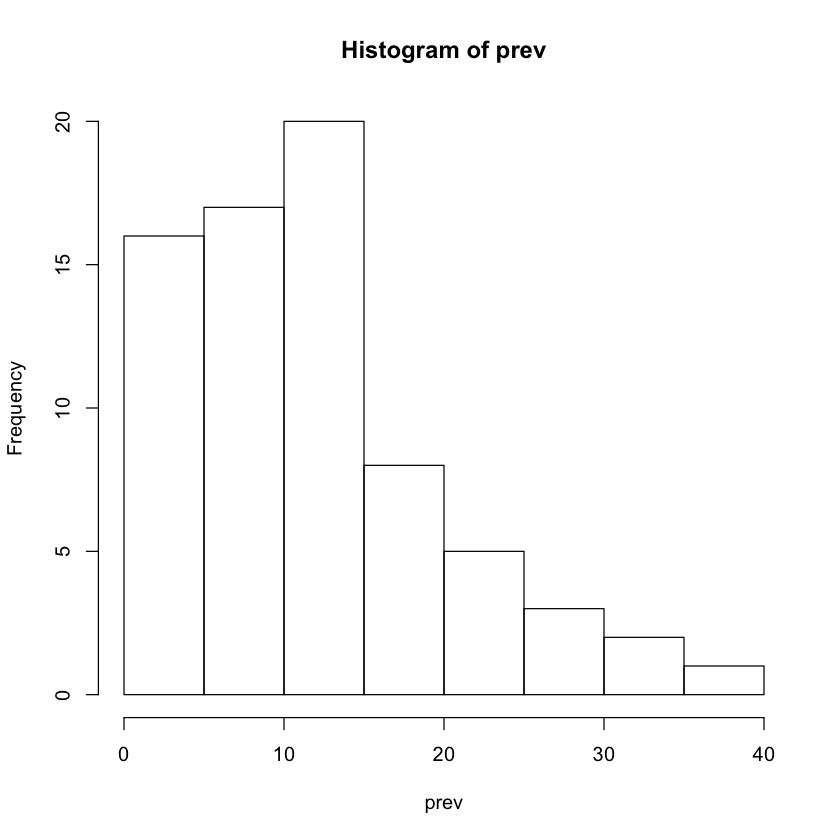


	Shapiro-Wilk normality test

data:  prev
W = 0.91936, p-value = 0.0002005


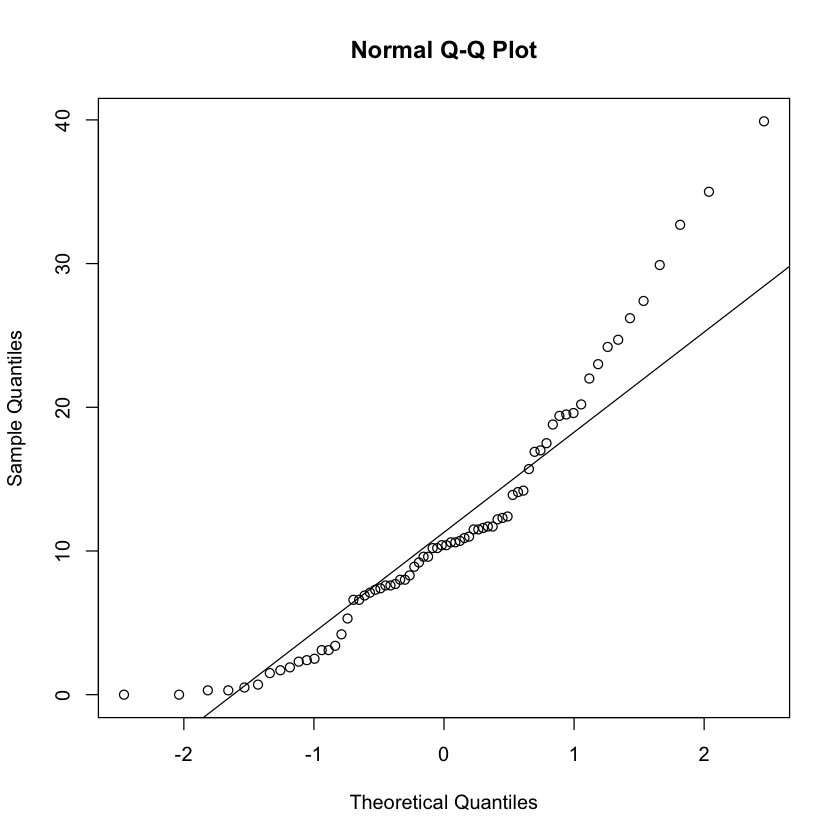

In [8]:
hist(prev)
qqnorm(prev)
qqline(prev)
shapiro.test(prev)

prev is also not normally distibuted


	Shapiro-Wilk normality test

data:  data$prev_sqrt
W = 0.98233, p-value = 0.4082


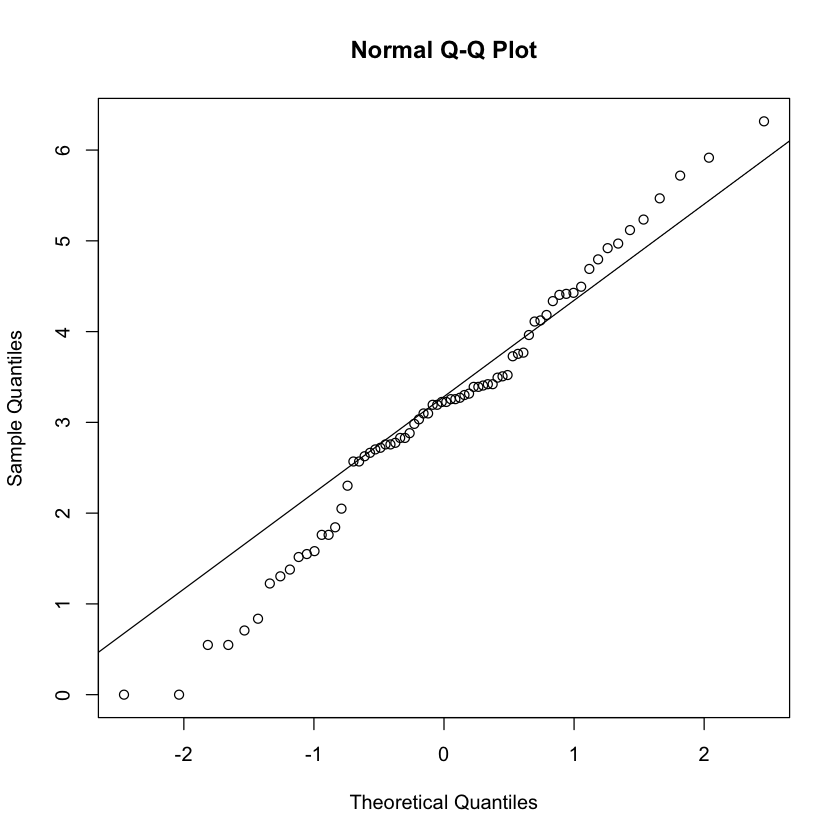

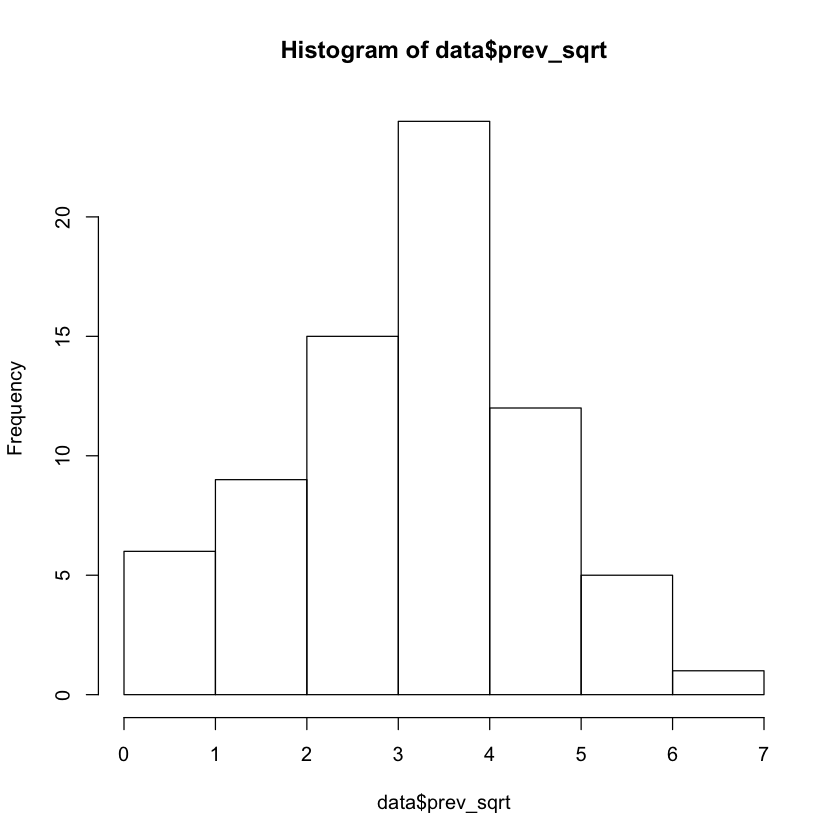

In [9]:
data$prev_sqrt  <- sqrt(prev)
qqnorm(data$prev_sqrt)
qqline(data$prev_sqrt)
shapiro.test(data$prev_sqrt)
hist(data$prev_sqrt)

Checking normal distribution of lepto

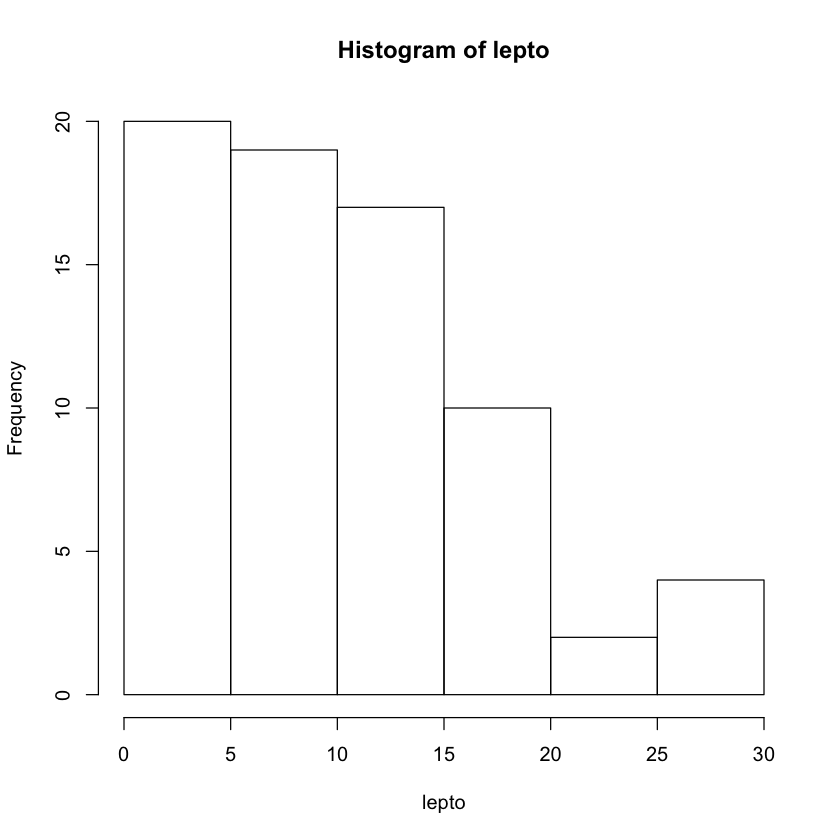


	Shapiro-Wilk normality test

data:  lepto
W = 0.94984, p-value = 0.006115


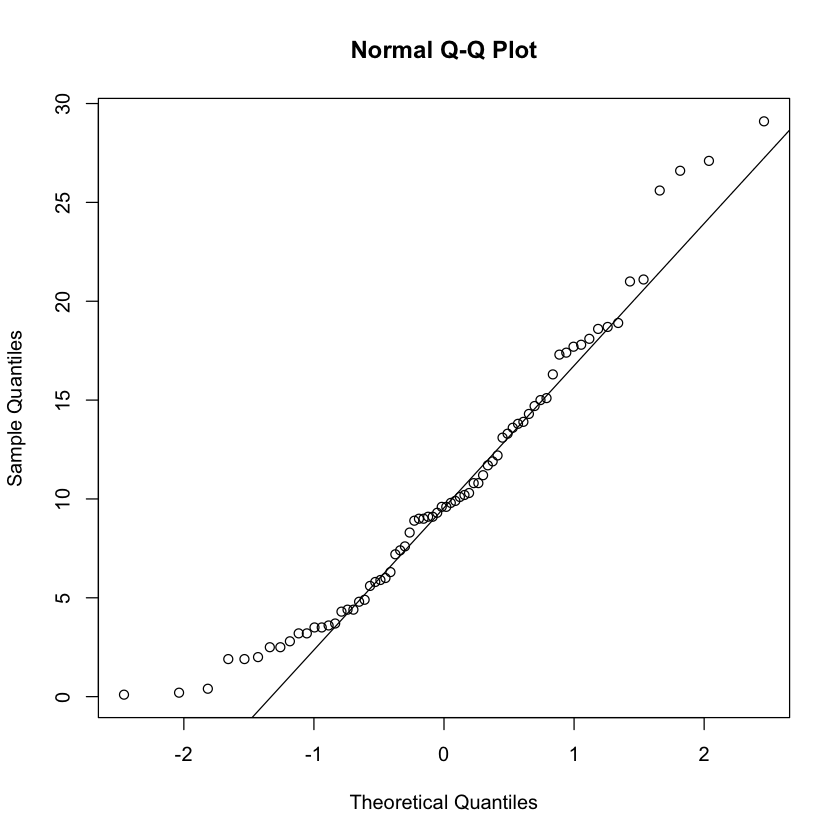

In [10]:
hist(lepto)
qqnorm(lepto)
qqline(lepto)
shapiro.test(lepto)

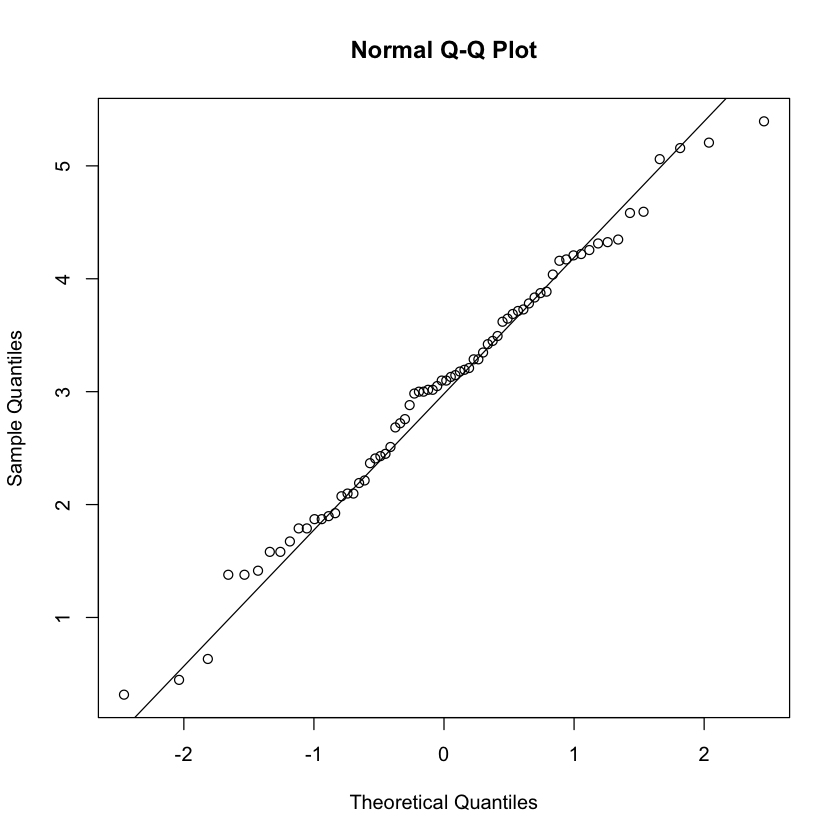

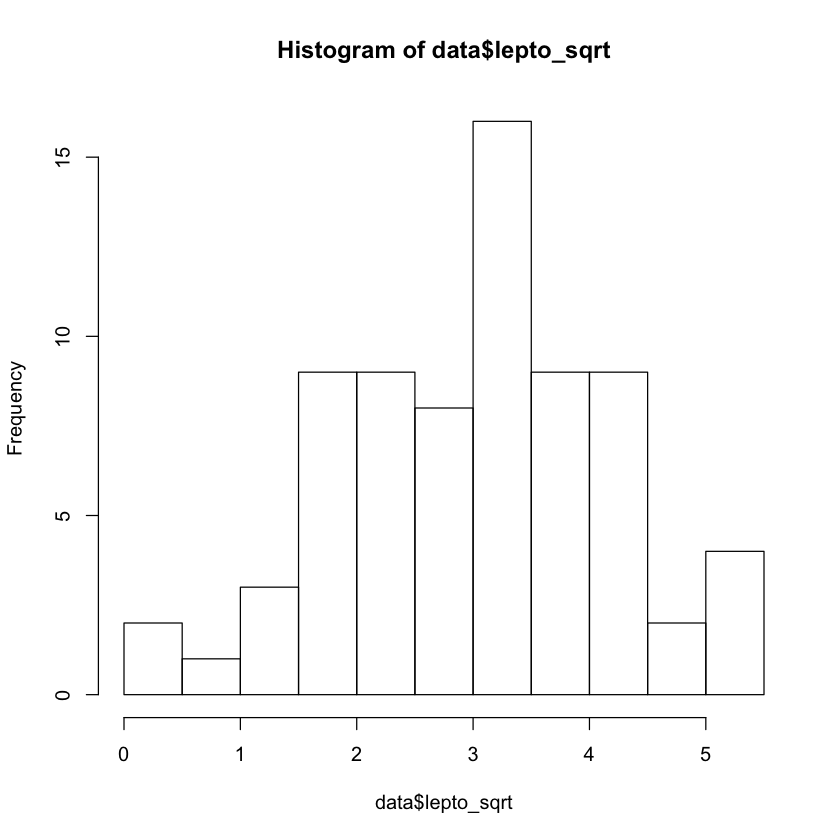

In [11]:
data$lepto_sqrt  <- sqrt(lepto)
qqnorm(data$lepto_sqrt)
qqline(data$lepto_sqrt)
hist(data$lepto_sqrt)

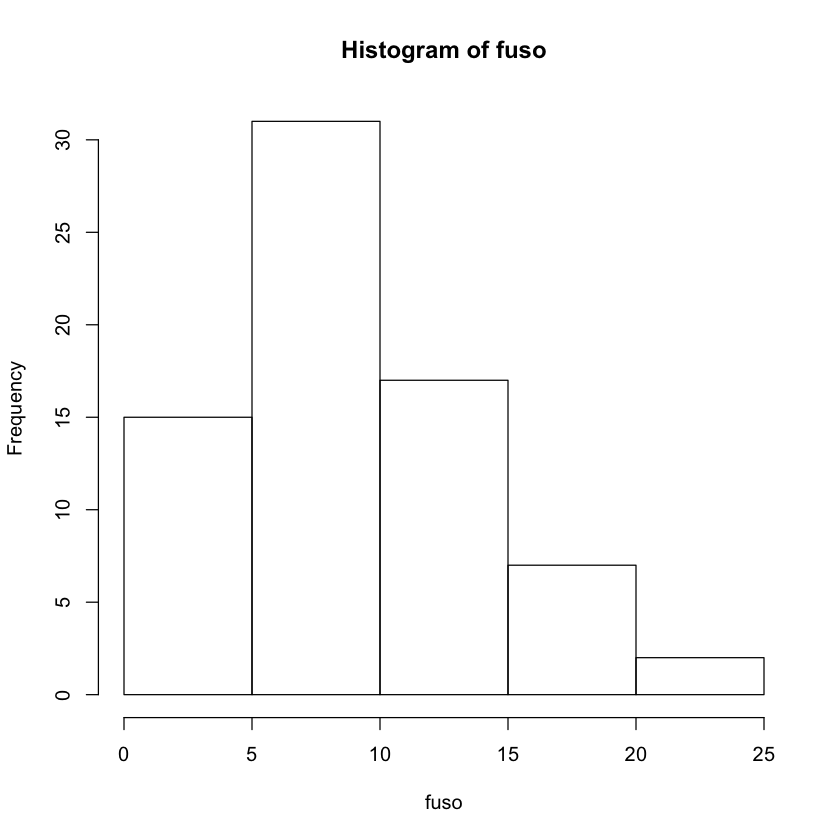


	Shapiro-Wilk normality test

data:  fuso
W = 0.95844, p-value = 0.01804


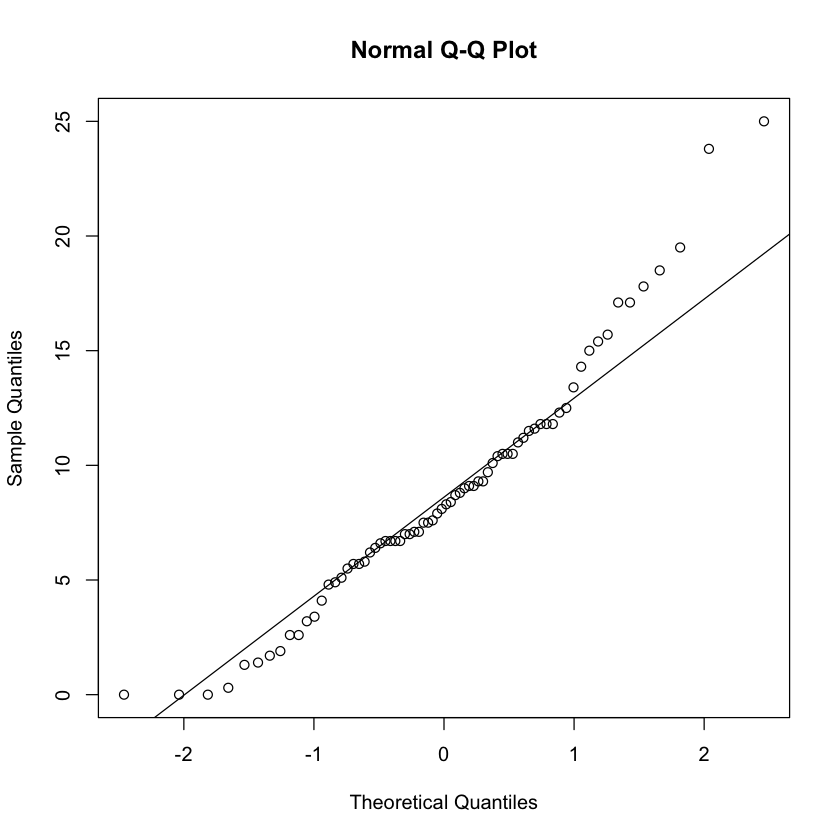

In [12]:
hist(fuso)
qqnorm(fuso)
qqline(fuso)
shapiro.test(fuso)


	Shapiro-Wilk normality test

data:  data$fuso_sqrt
W = 0.95448, p-value = 0.0109


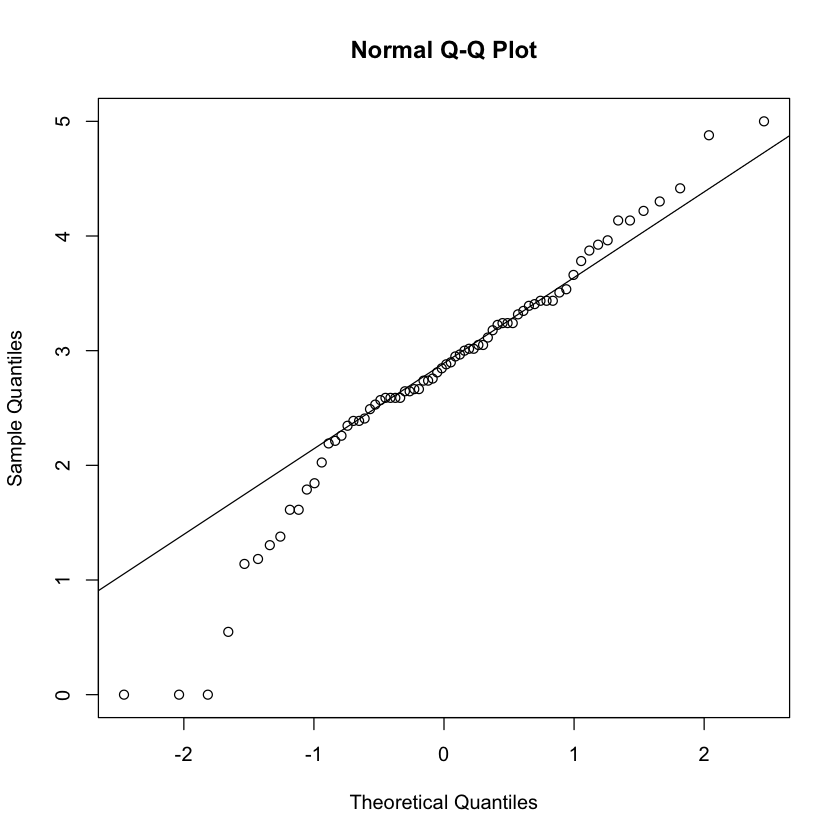

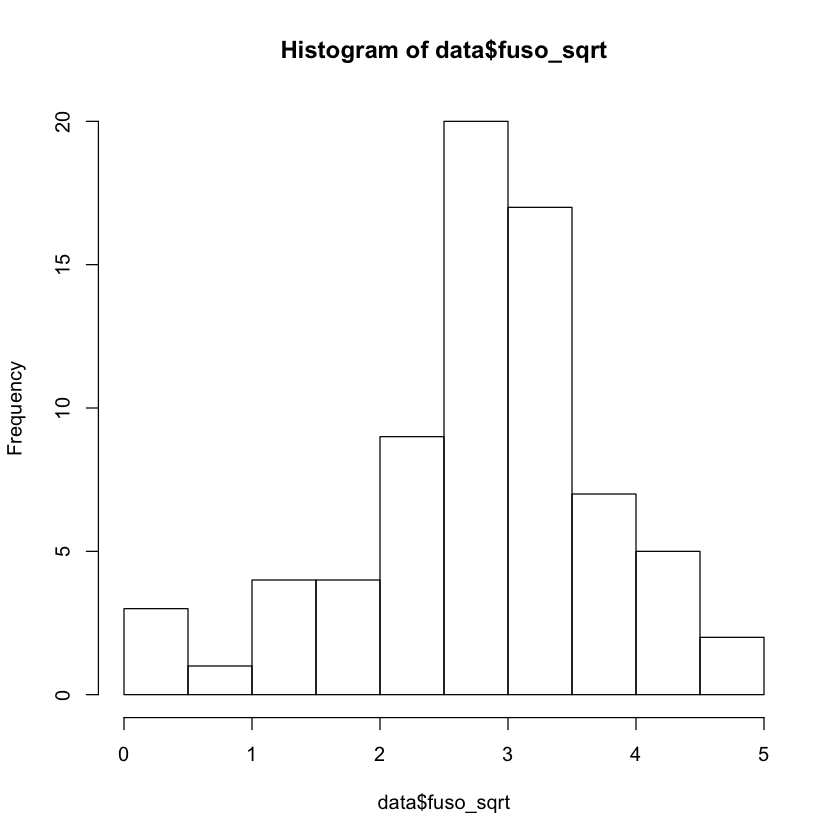

In [13]:
data$fuso_sqrt  <- sqrt(fuso)
qqnorm(data$fuso_sqrt)
qqline(data$fuso_sqrt)
shapiro.test(data$fuso_sqrt)
hist(data$fuso_sqrt)

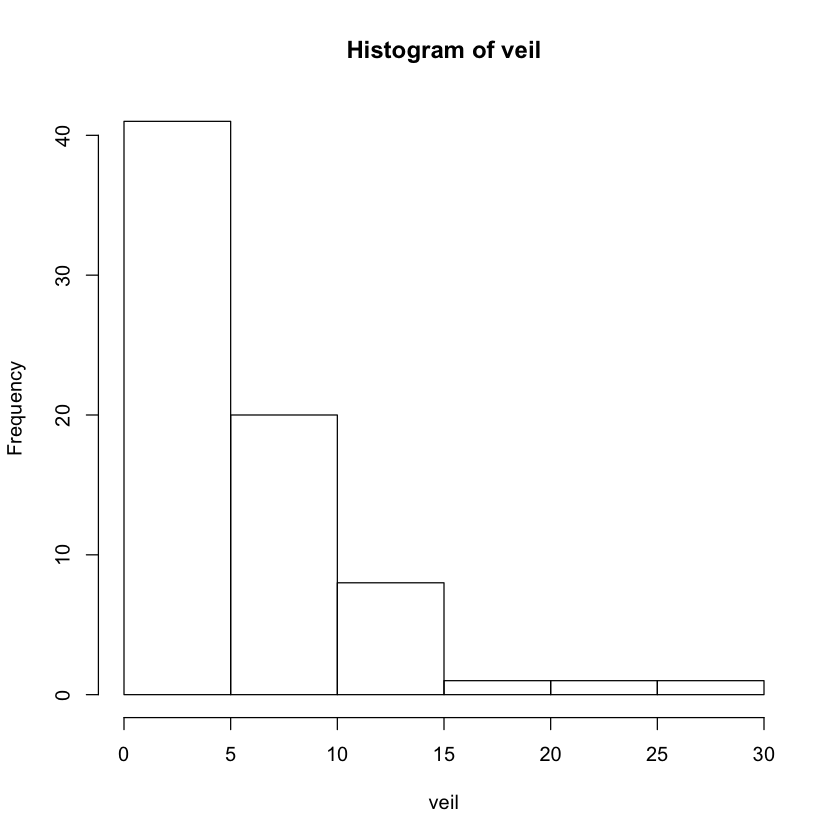


	Shapiro-Wilk normality test

data:  veil
W = 0.83414, p-value = 1.609e-07


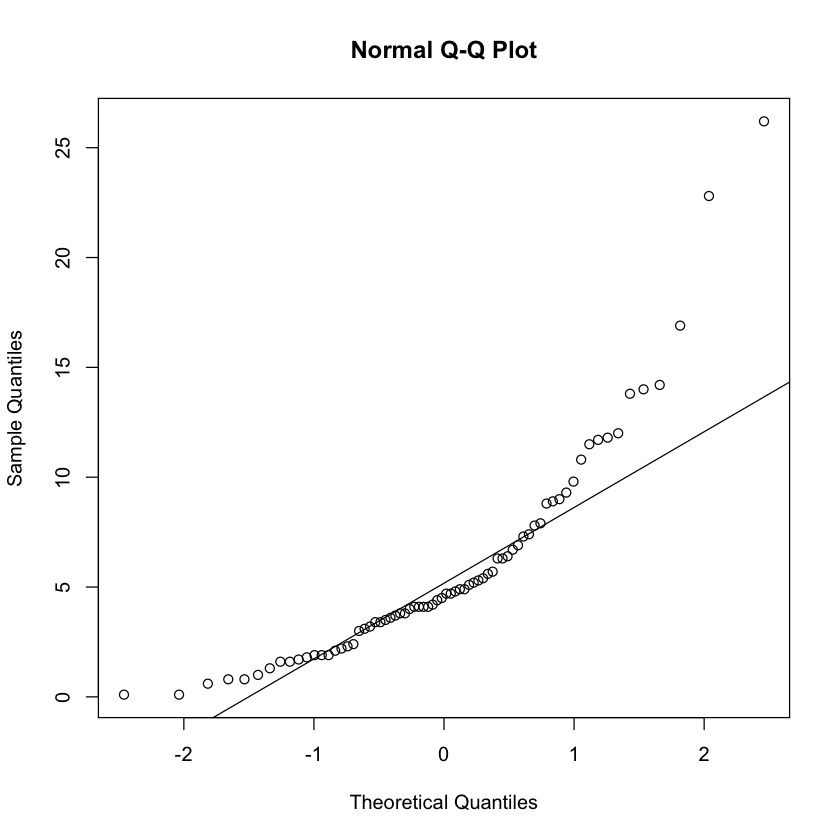

In [14]:
hist(veil)
qqnorm(veil)
qqline(veil)
shapiro.test(veil)


	Shapiro-Wilk normality test

data:  data$veil_sqrt
W = 0.97302, p-value = 0.1242


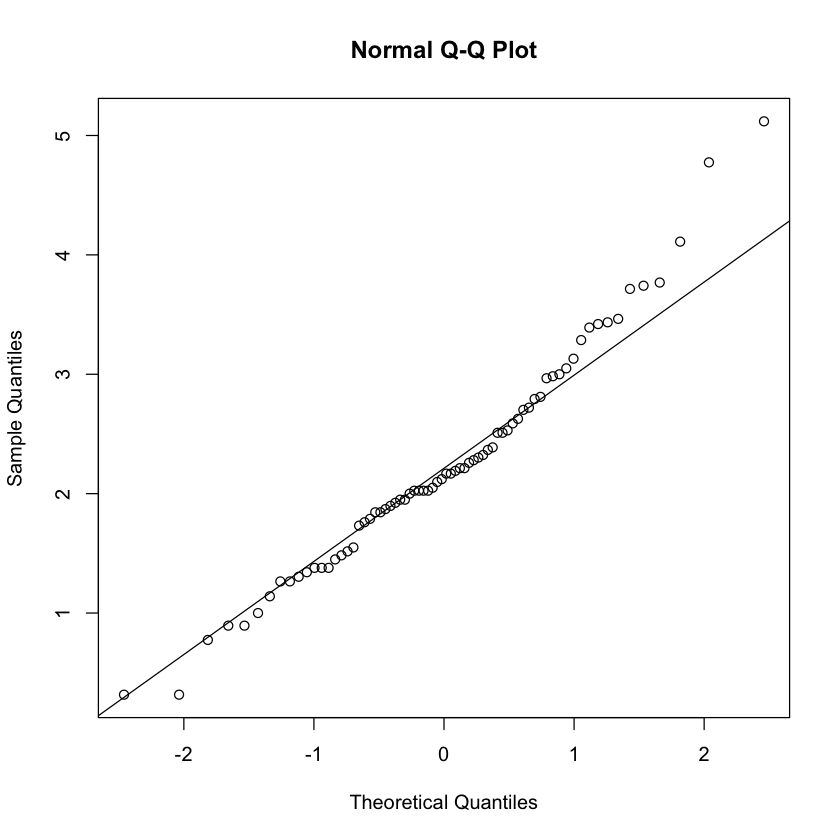

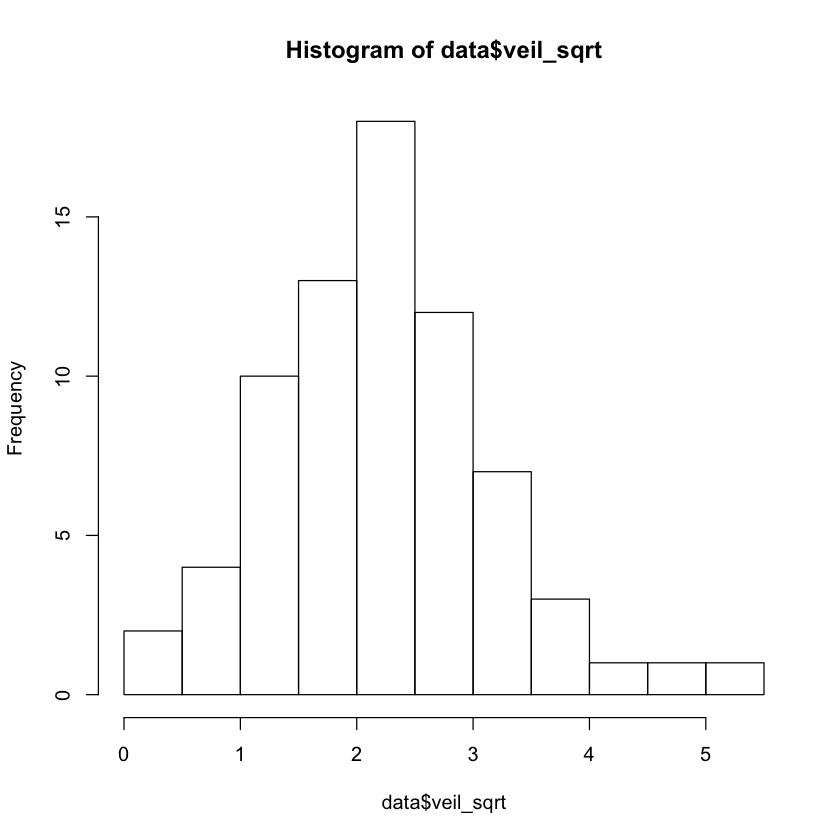

In [15]:
data$veil_sqrt  <- sqrt(veil)
qqnorm(data$veil_sqrt)
qqline(data$veil_sqrt)
shapiro.test(data$veil_sqrt)
hist(data$veil_sqrt)

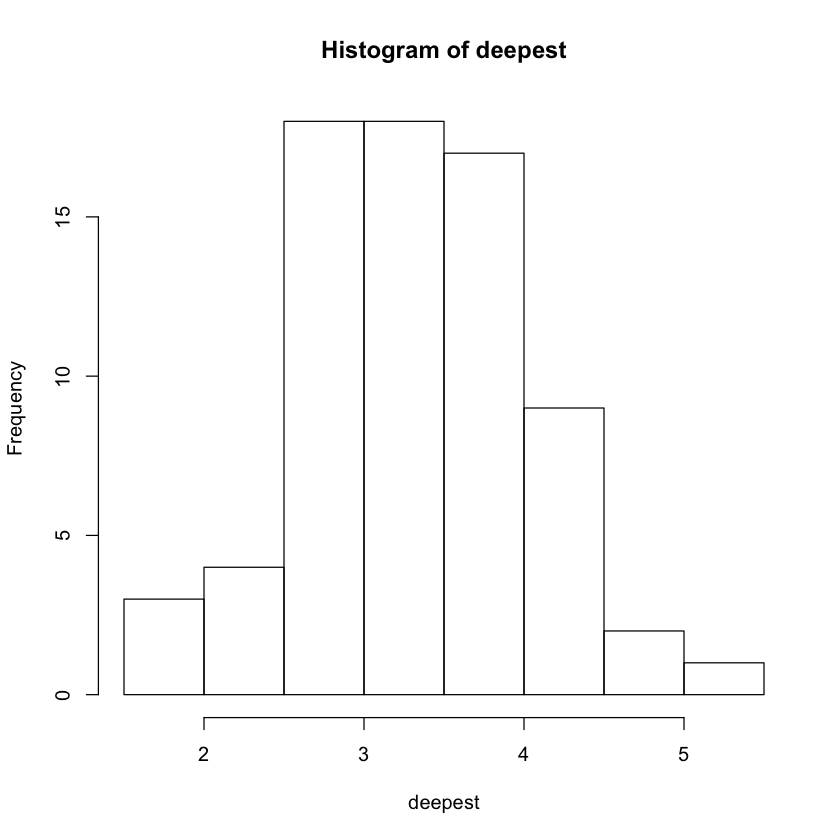


	Shapiro-Wilk normality test

data:  deepest
W = 0.98804, p-value = 0.7312


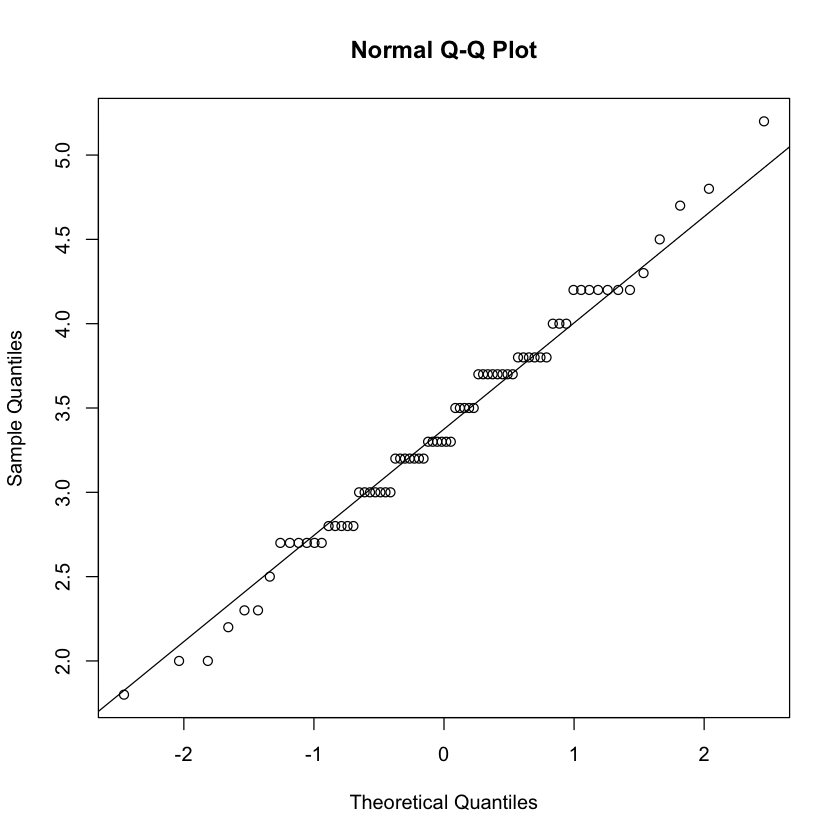

In [16]:
hist(deepest)
qqnorm(deepest)
qqline(deepest)
shapiro.test(deepest)

Deepest is normally distributed no transformation required

# Running the Anova for Lepto by time


In [18]:
lepto_time  <- aov(data$lepto_sqrt~time)
summary(lepto_time)

            Df Sum Sq Mean Sq F value Pr(>F)  
time         1   6.28   6.276   5.202 0.0256 *
Residuals   70  84.45   1.206                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

The F value is greater than 1 and p-value is less than 0.05 so there is difference in lepto count over time

In [19]:
table(data$time)


 1  2 
36 36 

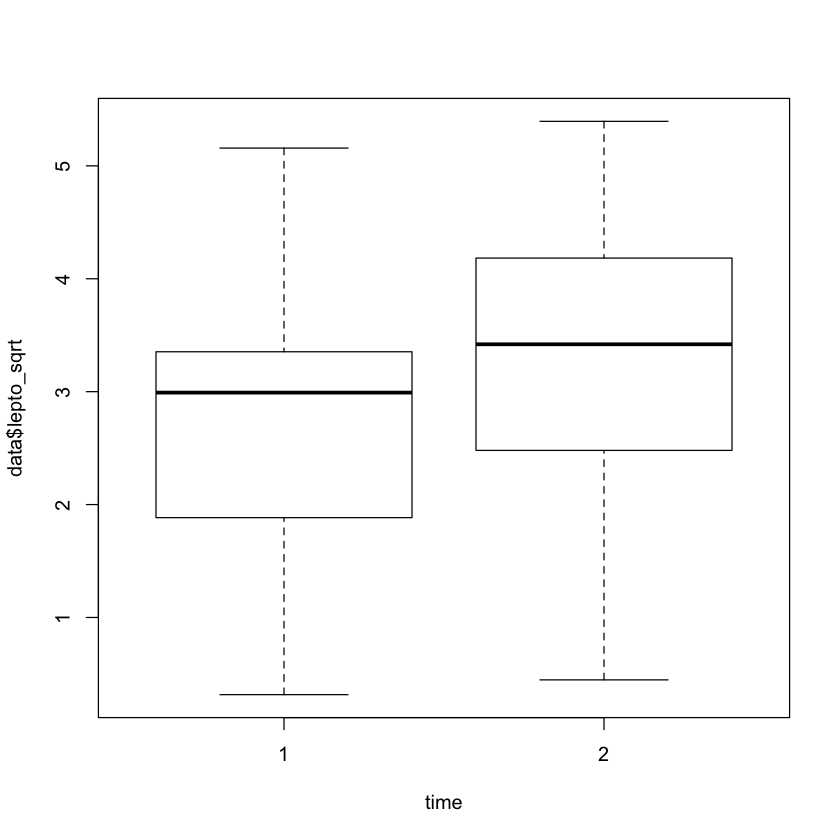

In [20]:
boxplot(data$lepto_sqrt~time)


Box plot indicates that the count of lepto bacteria has increased after gum cleaning

Running the Anova for Strep by time

In [21]:
strep_time  <- aov(data$strep_log~time)
summary(strep_time)

            Df Sum Sq Mean Sq F value Pr(>F)
time         1   0.60  0.6002    0.87  0.354
Residuals   70  48.29  0.6898               

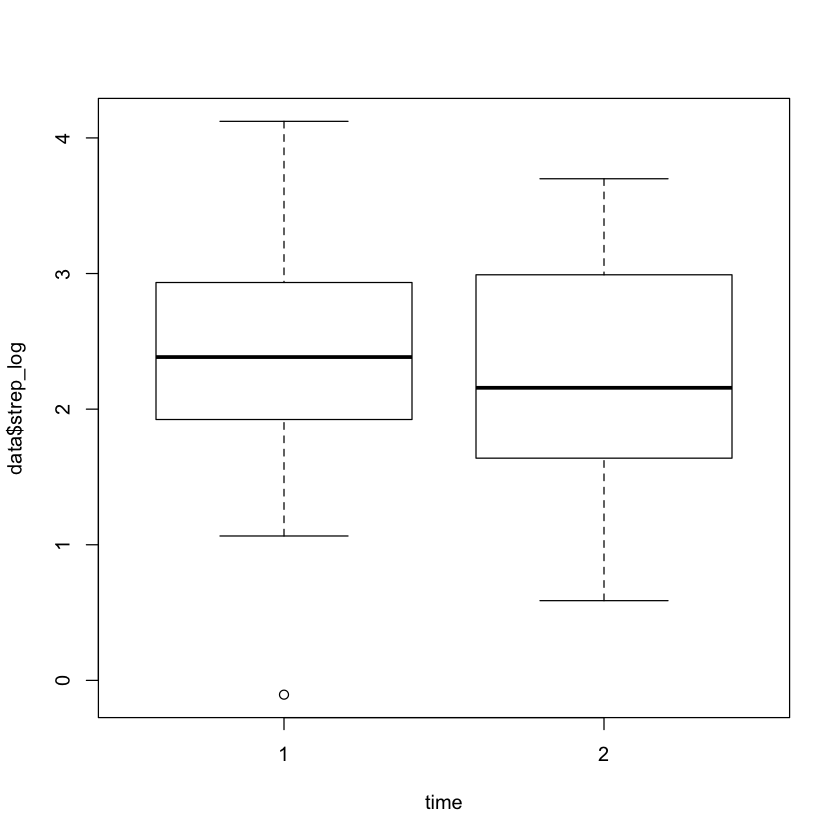

In [22]:
boxplot(data$strep_log~time)

The F-stat is not significant and p-value > 0.05 , Thus we conclude that strep has no significant change over time(i.e before gum cleaning and after gum cleaning

# Corelation Analysis

In [23]:
cor.test(data$strep_log,data$prev_sqrt)


	Pearson's product-moment correlation

data:  data$strep_log and data$prev_sqrt
t = -3.435, df = 70, p-value = 0.001
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5620173 -0.1624218
sample estimates:
       cor 
-0.3797993 


Null Hypothesis: There is no relation between strep and prev bacteria 
Alternate hypothesis: There is a significant relation between prev and strep bacteria.
We are testing the correlation between strep and prev
The t-stat value is -3.425
p-value is 0.001 which is less than 0.05. We reject the Null hypothesis.
We can conclude that strep and prev are significantly correlated with coefficient of -0.379 and p-value of 0.001

In [25]:
cor.test(data$strep_log,data$fuso_sqrt)


	Pearson's product-moment correlation

data:  data$strep_log and data$fuso_sqrt
t = -4.8827, df = 70, p-value = 6.366e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.6587832 -0.3083824
sample estimates:
      cor 
-0.504041 


We are testing the correlation between strep and fuso
Null Hypothesis: There is no relation between strep and fuso bacteria 
Alternate hypothesis: There is a significant relation between fuso and strep bacteria.
The t-stat value is -4.8827
p-value is 6.366e-06 which is less than 0.05.
We reject the Null hypothesis.
We can conclude that strep and fuso are significantly correlated with coefficient of -0.504 and p-value of 6.366e-06

In [26]:
cor.test(data$fuso_sqrt,data$lepto_sqrt)


	Pearson's product-moment correlation

data:  data$fuso_sqrt and data$lepto_sqrt
t = 0.82548, df = 70, p-value = 0.4119
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1365891  0.3225188
sample estimates:
       cor 
0.09818645 


Null Hypothesis: There is no relation between lepto and fuso bacteria 
Alternate hypothesis: There is a significant relation between fuso and lepto bacteria.
We are testing the correlation between fuso and lepto
The t-stat value is 0.82548
p-value is 0.4119 which is greater than 0.05.
We do not reject the Null hypothesis
We can conclude that lepto and fuso are not correlated 

# Linear Regression

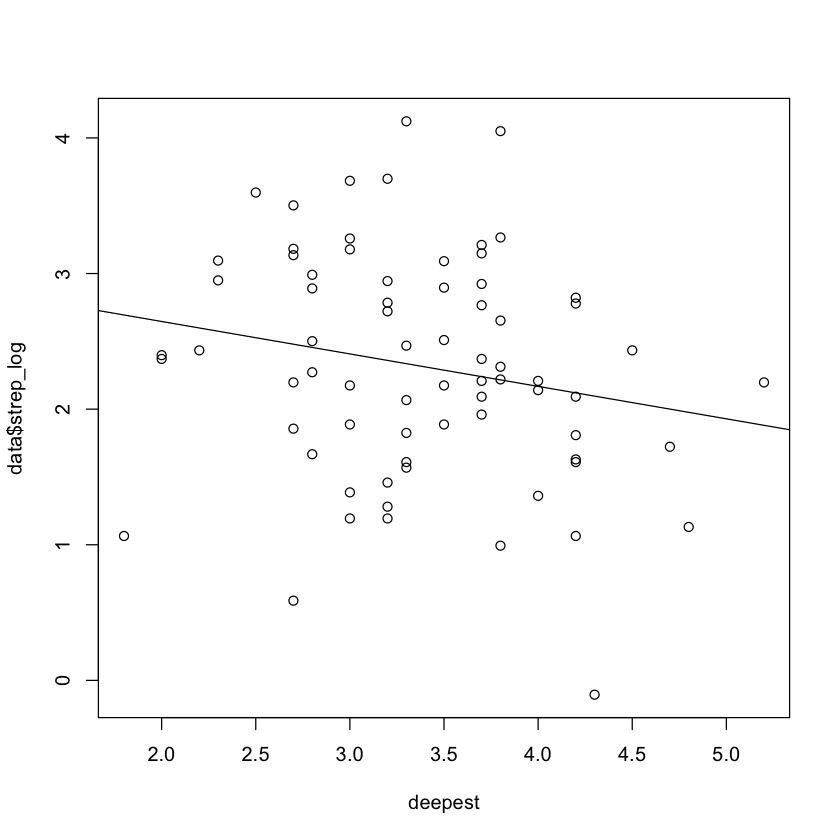

In [27]:

lm.fit  <- lm(data$strep_log~deepest)
plot(data$strep_log~deepest)
abline(lm.fit)

Strep species decrease as the deepest increases. There are fewer Strep bacteria count as we check  deeper

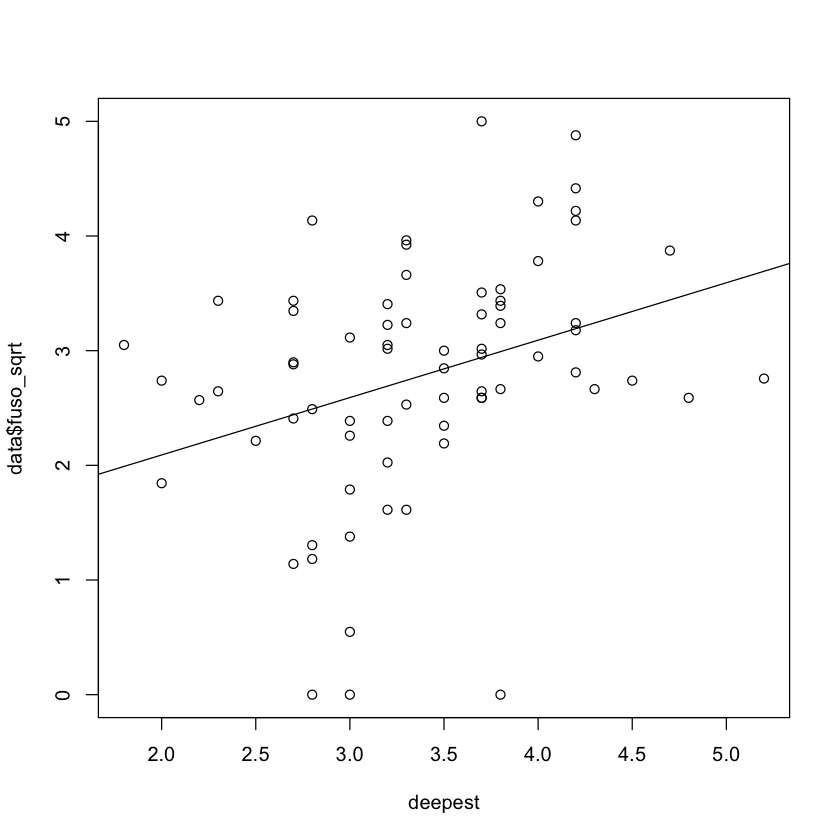

In [28]:

lm.fit_1  <- lm(data$fuso_sqrt~deepest)
plot(data$fuso_sqrt~deepest)
abline(lm.fit_1)

fuso species increases as we go deeper

# GGPLOT

(1)	ggplot histogram of prev variable.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



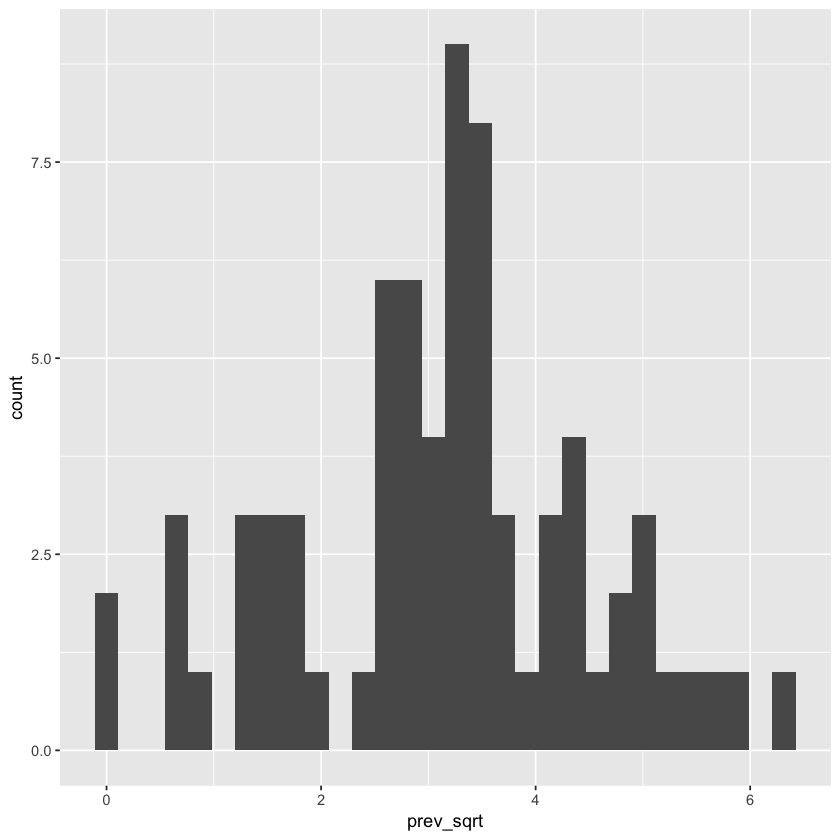

In [29]:
library(ggplot2)
ggplot(data=data,aes(prev_sqrt)) + 
  geom_histogram()

(2)	ggplot scatterplot of strep colored by time

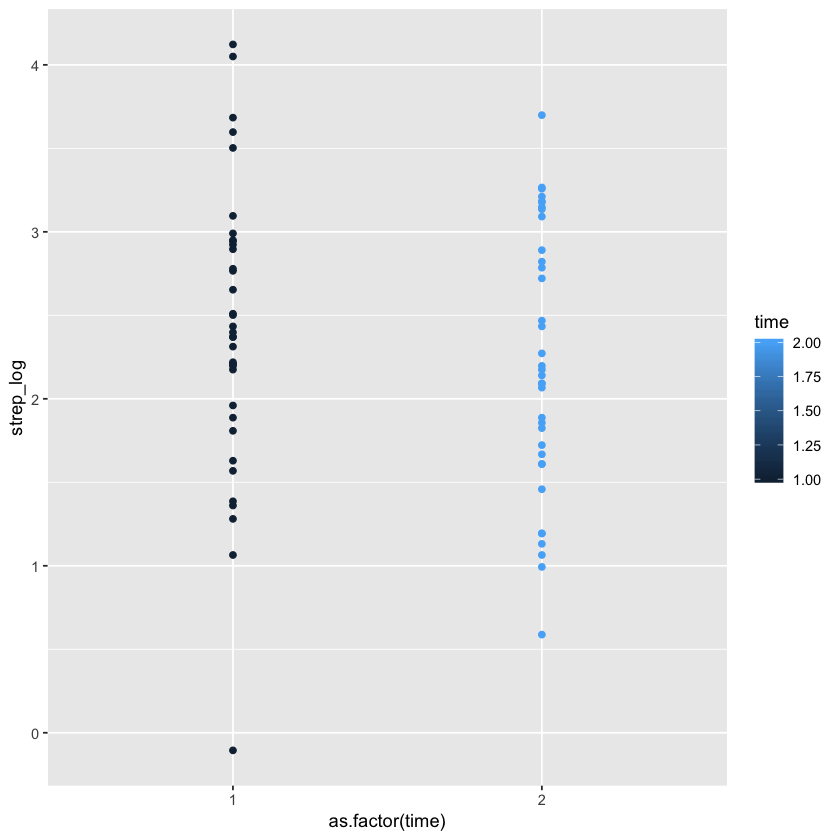

In [30]:
ggplot(data,
       aes(y=strep_log,x=as.factor(time)))+
  geom_point(aes(color=time))

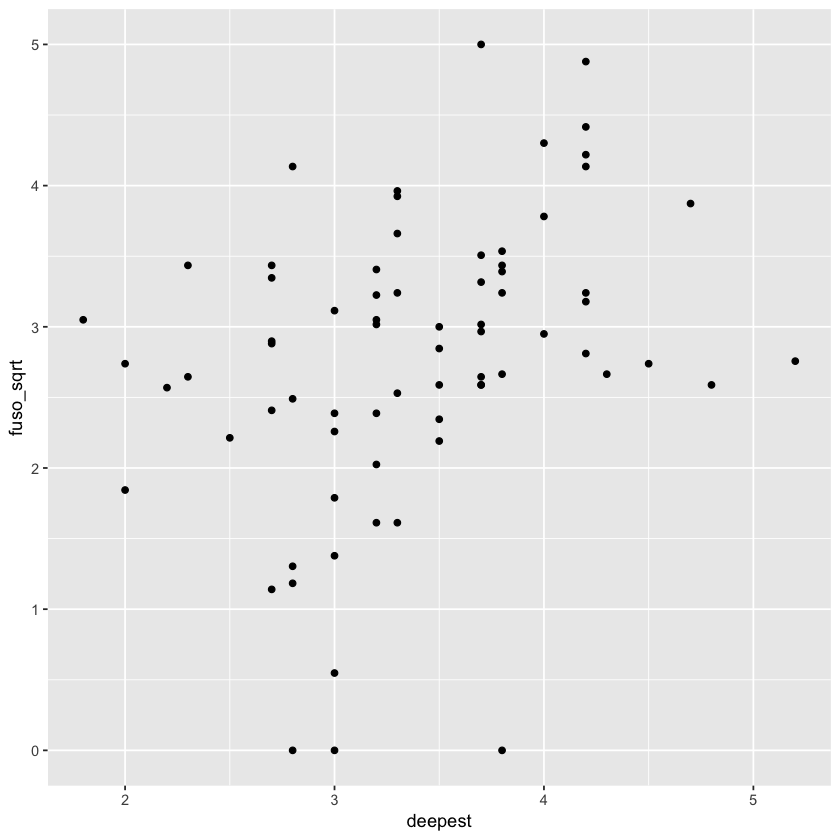

In [31]:
ggplot(data,
       aes(y=fuso_sqrt,x=deepest))+
  geom_point()

GGplot of Fuso vs deepest with smoothing algorithm

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



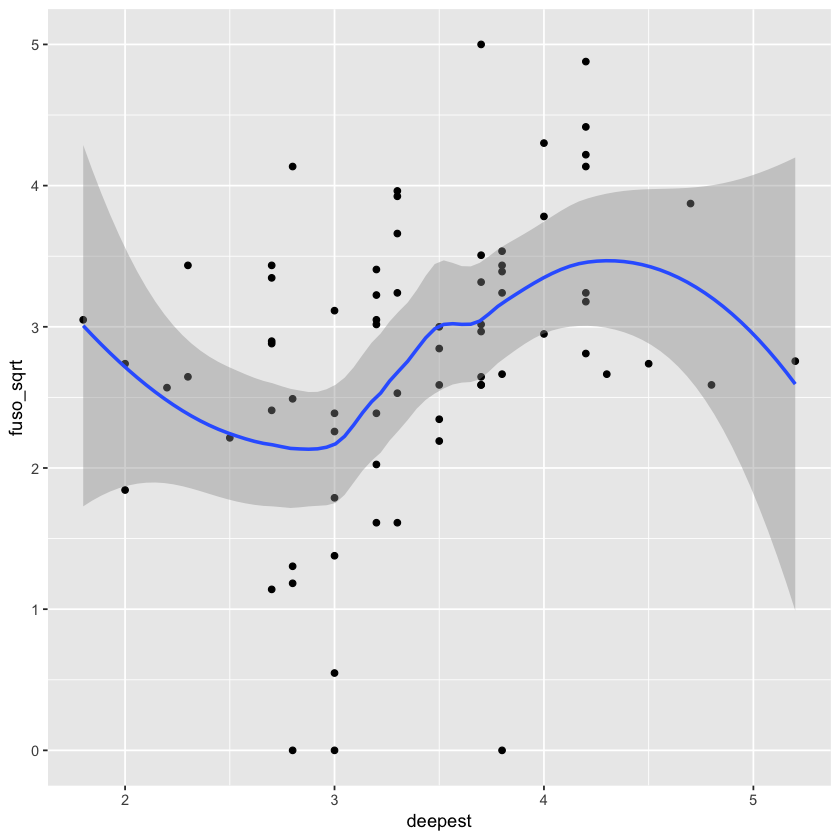

In [32]:
ggplot(data,
       aes(y=fuso_sqrt,x=deepest))+
  geom_point()+
geom_smooth()

# Part C 
Vegan Analysis

In [9]:
library(vegan)

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-6



In [13]:
vegan_data <- data[2:6]

In [53]:
head(vegan_data)
str(vegan_data)

strep,prev,lepto,fuso,veil
57.4,10.2,0.1,0.0,6.9
26.0,0.0,25.6,0.0,6.3
19.0,24.2,4.8,5.7,4.2
15.2,4.2,0.2,2.6,3.4
33.2,2.3,7.4,1.3,12.0
18.0,0.3,13.6,1.7,13.8


'data.frame':	72 obs. of  5 variables:
 $ strep: num  57.4 26 19 15.2 33.2 18 12.3 3.3 9.1 22 ...
 $ prev : num  10.2 0 24.2 4.2 2.3 0.3 11.5 24.7 32.7 8.9 ...
 $ lepto: num  0.1 25.6 4.8 0.2 7.4 13.6 9.1 6.3 1.9 17.8 ...
 $ fuso : num  0 0 5.7 2.6 1.3 1.7 5.5 10.4 14.3 4.8 ...
 $ veil : num  6.9 6.3 4.2 3.4 12 13.8 5.7 3 1.6 14 ...


In [60]:
t.vegan_data <- t(vegan_data)

In [61]:
shannon <- diversity(t.vegan_data)
shannon

strep     prev    lepto     fuso     veil 
3.979561 3.995215 4.056392 4.081478 3.985955

#Shannon --Typically ranges from 1.5 - 3.4, higher = more diverse
#all the bacteria are more diverse

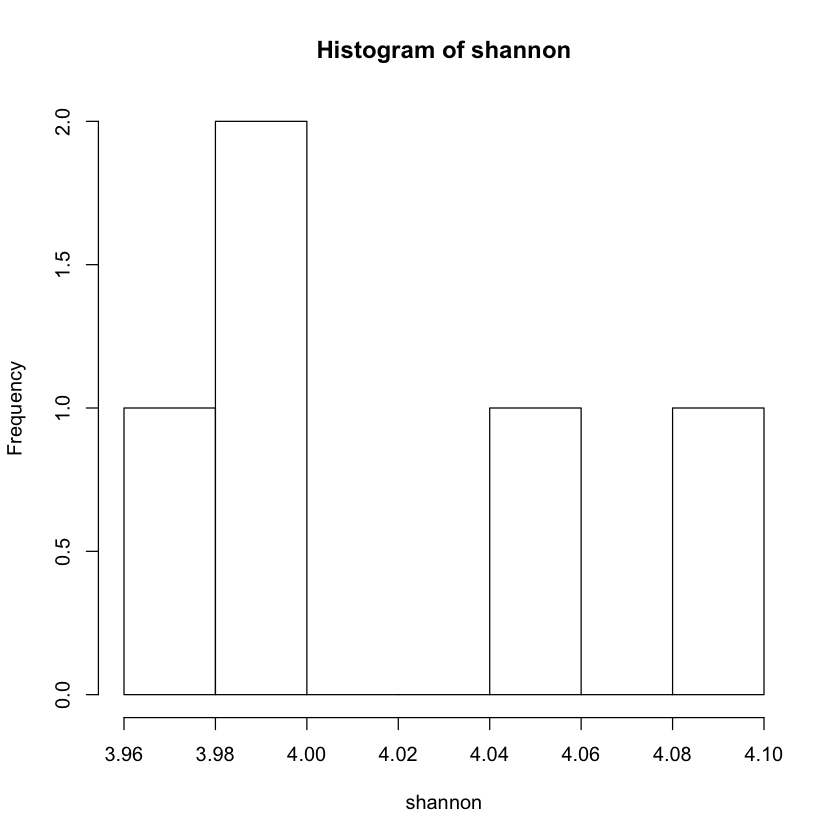

In [62]:
hist(shannon)

Rarefaction is a technique to assess expected species richness.

In [119]:
df2 = as.data.frame(sapply(vegan_data, as.integer))
t.df2 <- t(df2)

strep,prev,lepto,fuso,veil
57,10,0,0,6
26,0,25,0,6
19,24,4,5,4
15,4,0,2,3
33,2,7,1,12
18,0,13,1,13
12,11,9,5,5
3,24,6,10,3
9,32,1,14,1
22,8,17,4,14


In [120]:
spAbund <- rowSums(t.df2)
spAbund

strep  prev lepto  fuso  veil 
  978   810   716   602   390

In [121]:
raremin <- min(rowSums(t.df2))
raremin

[1] 390

#rarefaction uses the smallest number of observations per sample to extrapolate the expected number if all other samples only had that number of observations
view smallest # of obs 

In [122]:

sRare <- rarefy(t.df2, raremin) 
sRare

strep     prev    lepto     fuso     veil 
66.97708 62.95251 66.38534 66.16648 67.00000 
attr(,"Subsample")
[1] 390

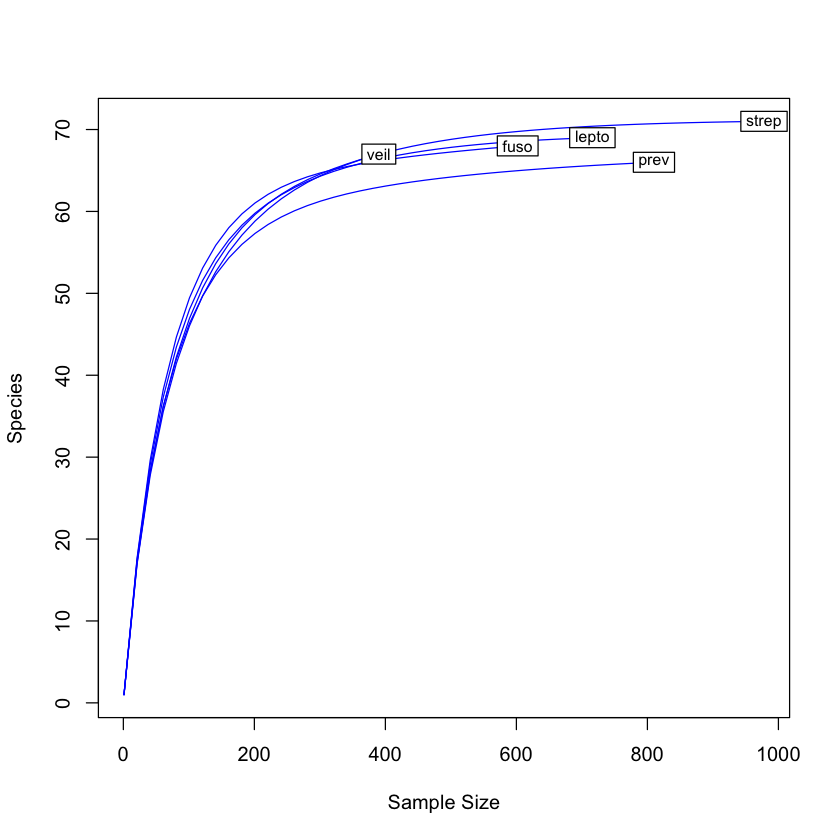

In [124]:
rarecurve(t.df2, col = "blue",step = 20) 
# produces rarefaction curves # squares are site numbers positioned at observed space. 
#To "rarefy" a larger site, follow the rarefaction curve until the curve corresponds 
#with the lesser site obs. This gives you rarefied species richness

Bray-curtis is good in detecting underlying ecological gradients
They are bounded between 0 and 1, where 0 = same composition, 1 = maximally dissimilar.
Bray–Curtis dissimilarity
- based on abundance or read count data 
- differences in microbial abundances between two samples (e.g., at species level) 
    values are from 0 to 1
    0 means both samples share the same species at exact the same abundances
    1 means both samples have complete different species abundances

          strep      prev     lepto      fuso
prev  0.5052808                              
lepto 0.3880810 0.4065920                    
fuso  0.4919394 0.3387611 0.3593512          
veil  0.5024827 0.5030801 0.3932163 0.4382979

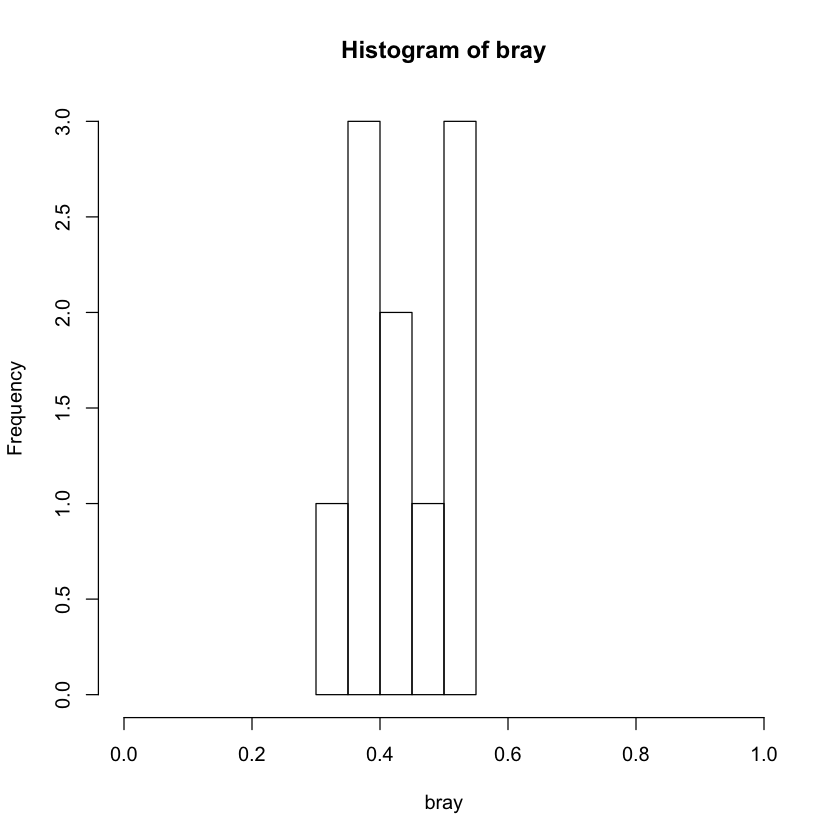

In [132]:

bray = vegdist(t.vegan_data, "bray") 
bray
hist(bray, xlim = range(0.0,1.0))


Bray-Curtis values indicate more similar communities (closer to a value of 0)

# multidimensional scaling plot using the Bray-Curtis matrix


#trace = FALSE indicates you wish to ignore in progress output of results. autotransform = FALSE stops vegan from #automatically transforming the data .

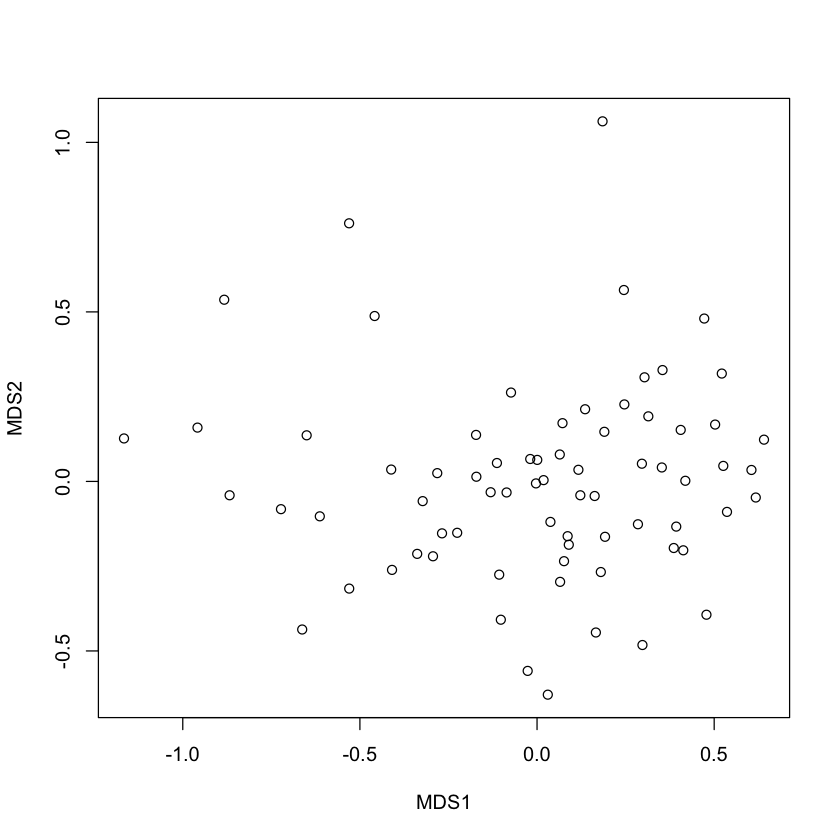

In [138]:
vegan_data.mds <- metaMDS(comm = vegan_data, distance = "bray", trace = FALSE, autotransform = FALSE)
plot(vegan_data.mds$points)

plot for each species  as a different colour.

In [139]:
MDS_xy <- data.frame(vegan_data.mds$points)

In [140]:
MDS_xy$status <- data$status

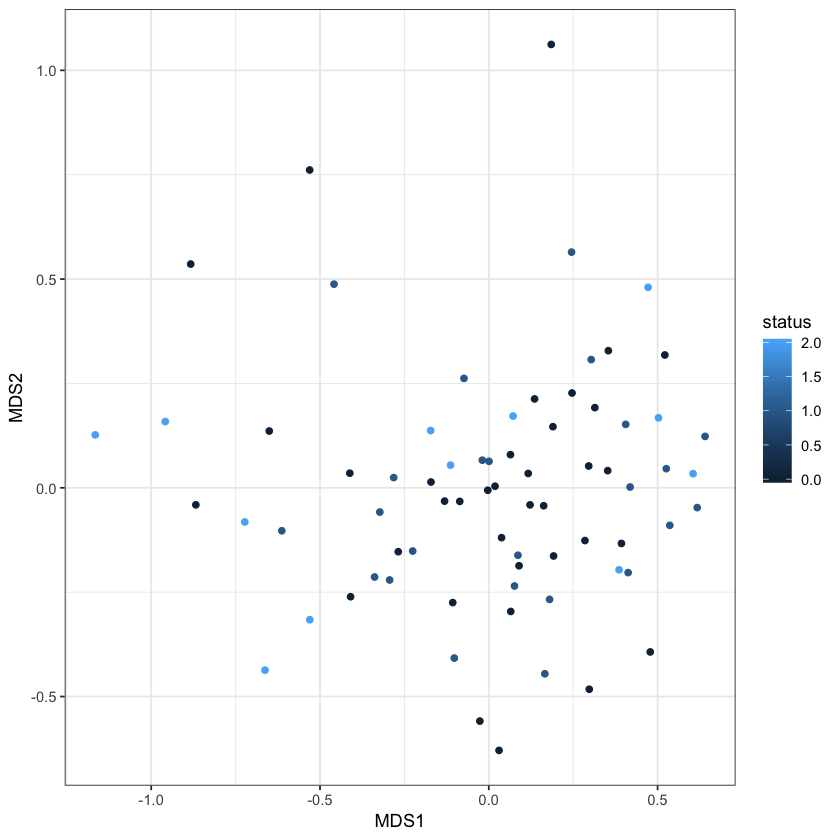

In [141]:

ggplot(MDS_xy, aes(MDS1, MDS2, color = status)) + geom_point() + theme_bw()

In [142]:
MDS_xy$time <- data$time

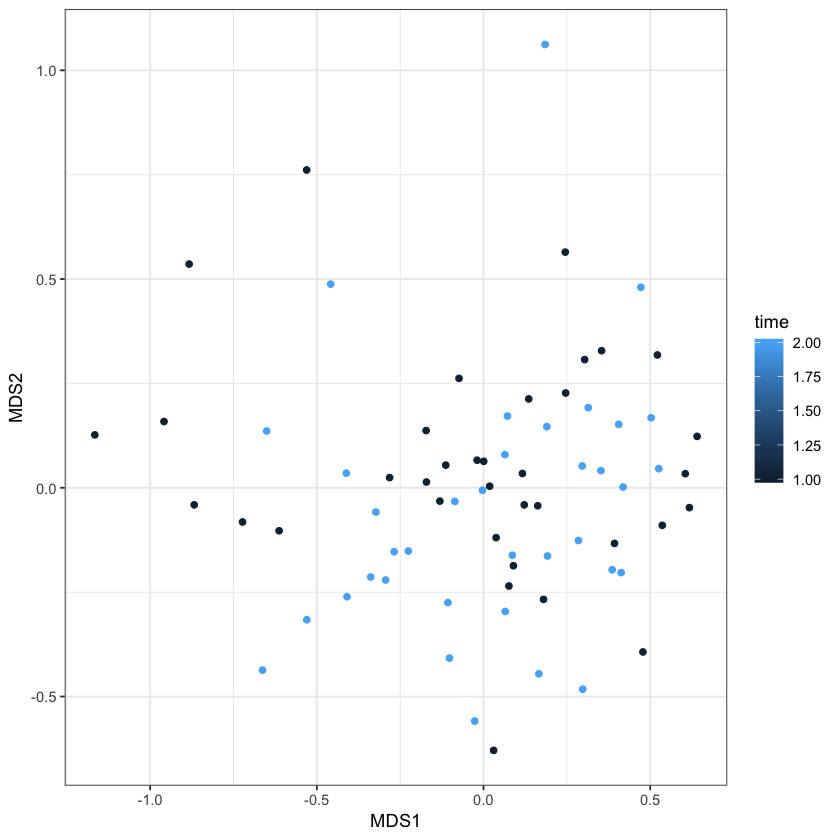

In [143]:
ggplot(MDS_xy, aes(MDS1, MDS2, color = time)) + geom_point() + theme_bw()

# Part D: Log2Fold analysis 

The log2(fold-change) is the log-ratio of a gene's or a transcript's expression values in two different conditions. 

In [1]:
a <- 1:10
b <- 10:1
fc <- b/a
df <- data.frame(a, b, fc, a.greaterthan.b = a > b)
df

a,b,fc,a.greaterthan.b
1,10,10.0000000,FALSE
2,9,4.5000000,FALSE
3,8,2.6666667,FALSE
4,7,1.7500000,FALSE
5,6,1.2000000,FALSE
6,5,0.8333333,TRUE
7,4,0.5714286,TRUE
8,3,0.3750000,TRUE
9,2,0.2222222,TRUE
10,1,0.1000000,TRUE


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang



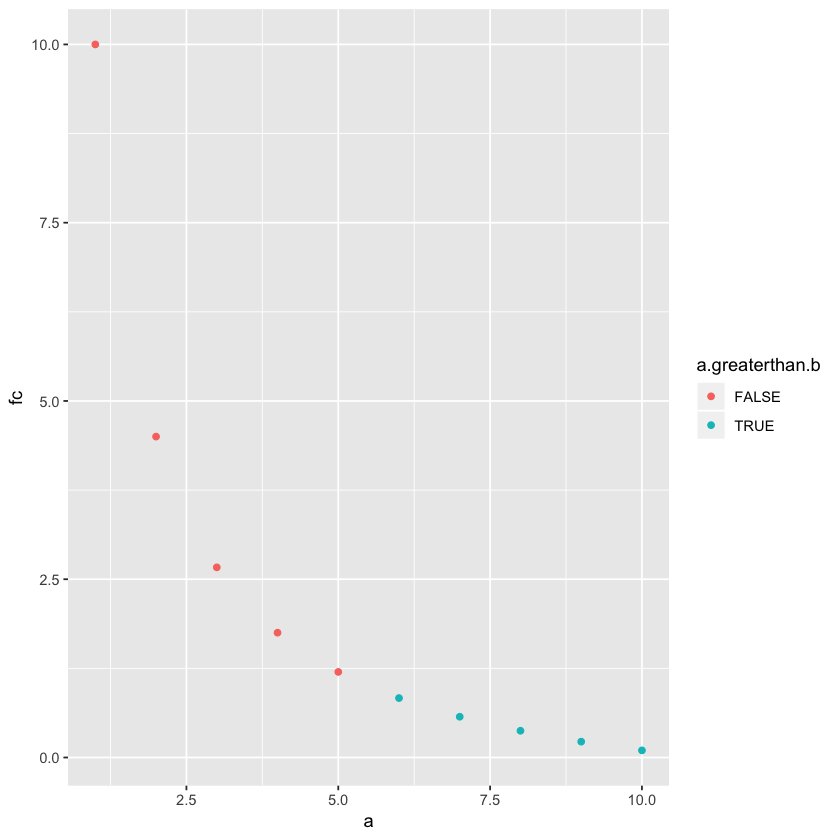

In [3]:
ggplot(df, aes(a, fc, colour = a.greaterthan.b), size = 8) +
geom_point()

If we use log2(fold change), fold changes lower than 1 (when B > A) become negative, while those greater than 1 (A > B) become positive. Now the values are symmetrical and it's easier to see fold changes in both directions on one plot.
log2FC=Log2(B)-Log2(A)


In [6]:
log2(b)-log2(a)

[1]  3.3219281  2.1699250  1.4150375  0.8073549  0.2630344 -0.2630344
 [7] -0.8073549 -1.4150375 -2.1699250 -3.3219281

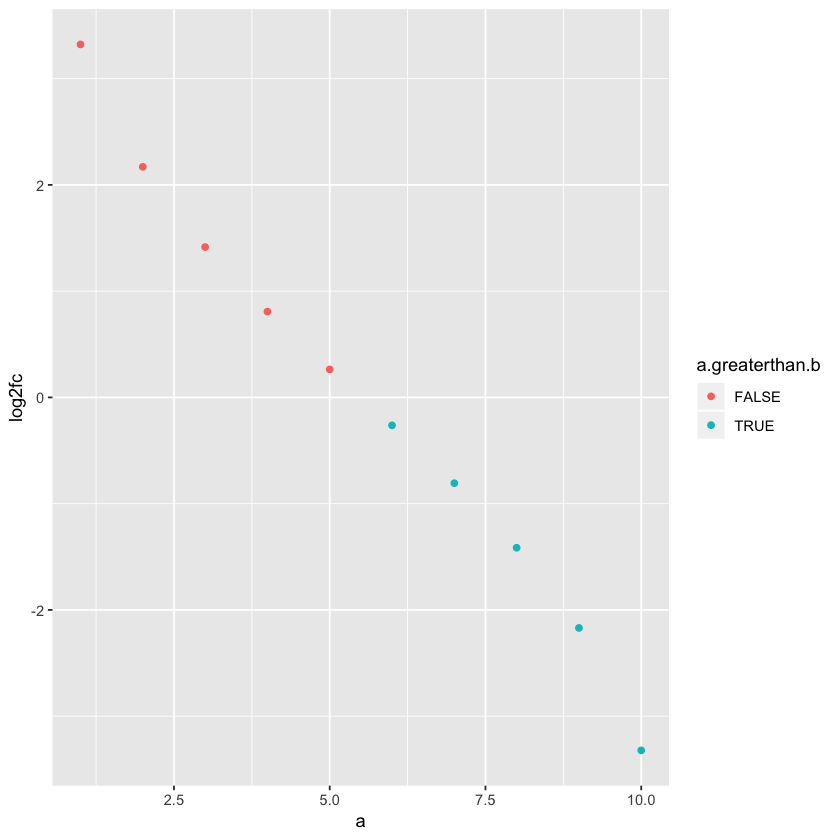

In [4]:
log2fc <- log2(fc)
ggplot(df, aes(a, log2fc, colour = a.greaterthan.b), size = 8) +
geom_point()

We can see explicitly that fold changes < 1 become negative and those > 1 become positive:
The 5 data points where b>a become positive and 

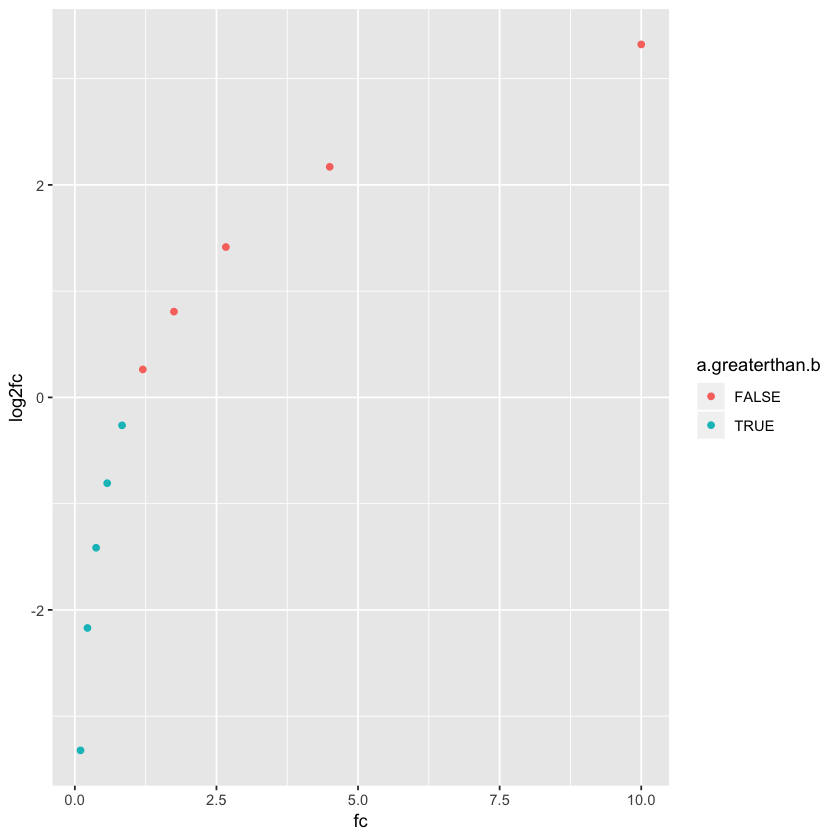

In [5]:
ggplot(df, aes(fc, log2fc, colour = a.greaterthan.b), size = 8) +
geom_point()

Its also useful to know that a log2 fold change (B/A) of 1 means B is twice as large as A, while log2fc of 2 means B is 4x as large as A. Conversely, -1 means A is twice as large as B, and -2 means A is 4x as large as B.

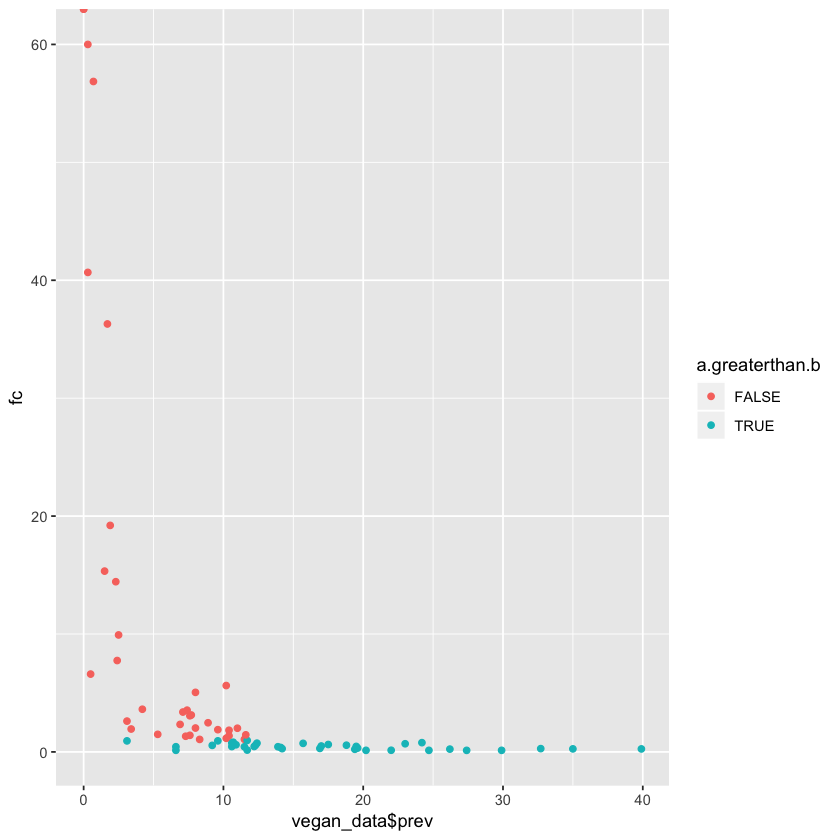

In [15]:
fc  <- vegan_data$strep/vegan_data$prev
df <- data.frame(vegan_data$prev,vegan_data$strep, fc, a.greaterthan.b = vegan_data$prev > vegan_data$strep)
ggplot(df, aes(vegan_data$prev, fc, colour = a.greaterthan.b), size = 8) +
geom_point()


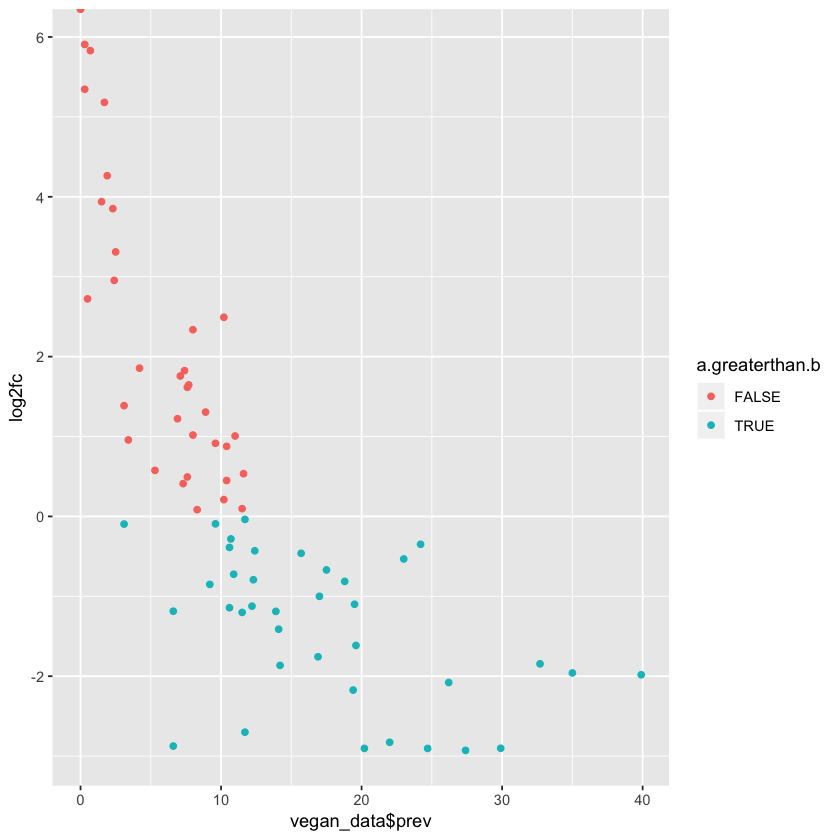

In [16]:
log2fc <- log2(fc)
ggplot(df, aes(vegan_data$prev, log2fc, colour = a.greaterthan.b), size = 8) +
geom_point()

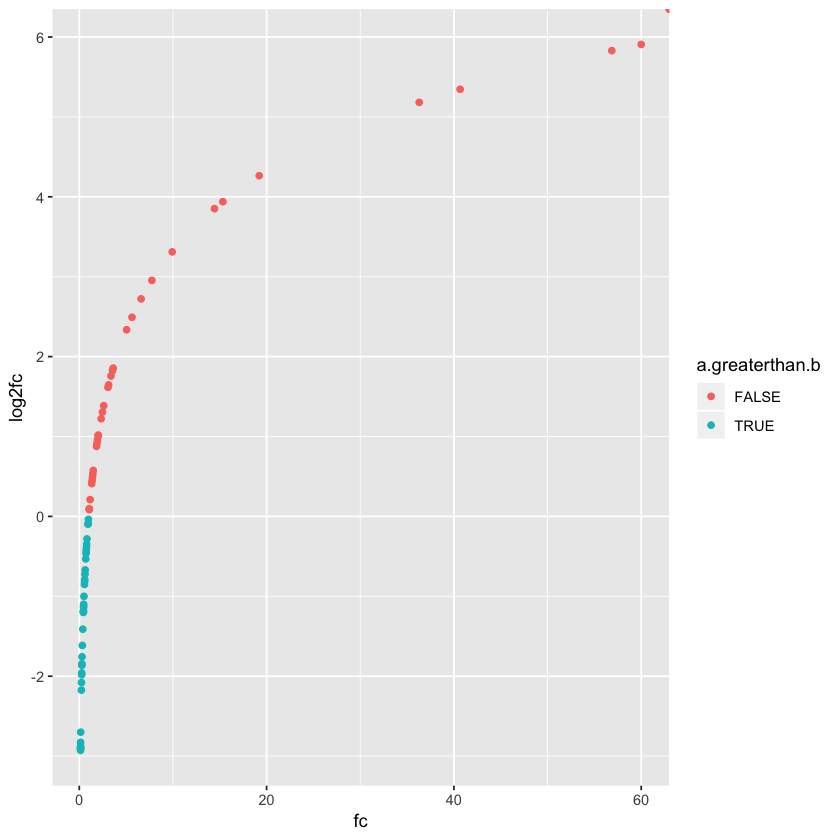

In [17]:
ggplot(df, aes(fc, log2fc, colour = a.greaterthan.b), size = 8) +
geom_point()

